# Model: Logistic Regression

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
with open("top10_corr_df.pkl",'rb') as fp:
    df = pickle.load(fp)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.linear_model import LogisticRegression

# Fitting and training
clf = LogisticRegression()
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.19      0.00      0.00      2873
         Buy       0.45      0.03      0.05      5588
        Hold       0.44      0.98      0.61      6582

   micro avg       0.44      0.44      0.44     15043
   macro avg       0.36      0.34      0.22     15043
weighted avg       0.40      0.44      0.29     15043



### Confusion Matrix

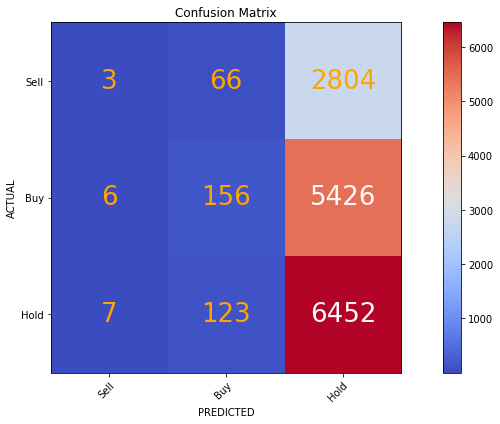

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [12]:
# Parameters to Tune
params = {'penalty': ['l1', 'l2'],
          'C': [1.5**n for n in range(0, 10, 2)],
          'fit_intercept': [True, False],
          'intercept_scaling': [1, 10, 50],
          'solver': ['liblinear', 'saga']}

In [13]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.2249048806845743, total=   0.3s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.4s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.8s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.8s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.221024174682257, total=   7.9s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22224047881541345, total=   9.6s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22483571333390182, total=   0.7s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.8s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.6s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22493359365805823, total=   6.8s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22113257779336162, total=   7.3s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22224047881541345, total=   8.2s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.2249048806845743, total=   0.3s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.3s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22224047881541345, total=   0.3s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22484530720680065, total=  10.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.221024174682257, total=   8.1s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22224047881541345, total=   8.4s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22483571333390182, total=   0.9s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22129358271065017, total=   0.6s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.8s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22493359365805823, total=   8.9s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22113257779336162, total=   8.7s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22224047881541345, total=   9.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22485229978262142, total=   0.3s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22484530720680065, total=  10.2s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.221024174682257, total=   9.6s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22224047881541345, total=  10.2s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22478309019059015, total=   0.6s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2211139979080221, total=   0.5s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22224047881541345, total=   0.4s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22493359365805823, total=   8.6s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22113257779336162, total=   8.5s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22224047881541345, total=   8.4s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.30927682940511153, total=   4.1s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.2352657562385637, total=   8.4s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.3148681416217076, total=   4.8s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.31614177149906403, total=  10.2s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.3249290160227993, total=  10.2s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.3295939529839956, total=   8.4s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.3013995772754869, total=   2.5s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.24422812606305588, total=   3.3s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.31424809101395584, total=   3.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3191417202953513, total=   8.4s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.33173683110442304, total=   8.5s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.33446114533312943, total=   8.1s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3098808232820962, total=   4.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.23444857320827958, total=   7.3s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3145436186677146, total=   5.2s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3161114877959427, total=   7.8s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3247429152384726, total=   8.9s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.32972374461123616, total=   7.8s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.3013995772754869, total=   2.8s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.24422812606305588, total=   3.2s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.31424809101395584, total=   3.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.31919583393677525, total=   8.4s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.3315758382803064, total=   8.3s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.33433577899020045, total=   8.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.3089474361016249, total=   3.9s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.23398470690939555, total=   7.5s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.31450396746774706, total=   5.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.31590130961737956, total=   7.3s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.32492887689442007, total=   8.8s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.3302217009926343, total=   7.1s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.3013995772754869, total=   2.3s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.24422812606305588, total=   3.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.31424809101395584, total=   2.9s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.31917163923416836, total=   6.6s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3317961061060238, total=   7.7s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3341179652486049, total=   7.9s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22489022364030387, total=   0.3s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.4s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.3s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22484530720680065, total=   9.3s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.2211139979080221, total=   8.8s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22224047881541345, total=  10.4s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22482107594960676, total=   0.8s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   1.3s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.7s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22493359365805823, total=   7.5s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22113257779336162, total=   7.5s
[CV] C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22224047881541345, total=   8.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22489022364030387, total=   0.4s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22484530720680065, total=   9.6s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.2211139979080221, total=  10.3s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22224047881541345, total=   9.6s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22483766388609436, total=   1.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.9s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.7s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22493359365805823, total=   8.5s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22113257779336162, total=   8.1s
[CV] C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22224047881541345, total=   8.6s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22499313724952275, total=   0.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22120380058145442, total=   0.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.6s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.2211139979080221, total=   9.1s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22224047881541345, total=   8.6s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22478309019059015, total=   0.9s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2211139979080221, total=   0.5s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22224047881541345, total=   0.5s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22493359365805823, total=   7.3s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22113257779336162, total=   8.1s
[CV] C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22224047881541345, total=   9.4s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.311759258389157, total= 2.0min
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.23525363477243344, total= 3.3min
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.3149091964054107, total= 2.0min
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.3162902332671604, total=   7.2s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.3248793696232851, total=   9.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.32980484140086536, total=   7.8s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.30031246179922766, total=   3.2s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.23918990223975603, total=   7.3s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.31555905792544575, total=   2.7s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.31917467500548263, total=   8.7s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3317971842425311, total=   8.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3341613412395798, total=   7.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3101375861244195, total= 1.9min
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.23427846253479215, total= 3.6min
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.31467930483961426, total= 1.7min
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.31632495525371024, total=   7.3s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3248237392906273, total=   8.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3301217340073819, total=   7.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.30031246179922766, total=   2.3s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.23918990223975603, total=   6.2s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.31555905792544575, total=   2.3s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.31916953283880845, total=   6.8s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.33168721718960664, total=   7.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.3341179652486049, total=   7.0s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.31050238376462164, total= 1.7min
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.23525363477243344, total= 3.1min
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.3145396427077732, total= 1.7min
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.3163230215634274, total=   6.5s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.32493608332037677, total=   8.2s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.33011970223727055, total=   6.6s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.30031246179922766, total=   2.3s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.23918990223975603, total=   6.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.31555905792544575, total=   2.3s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.31917163923416836, total=   6.9s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3315758382803064, total=   7.1s
[CV] C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.25, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.33446032019410143, total=   6.7s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22482107594960676, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.2211139979080221, total=   8.1s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22224047881541345, total=   8.4s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22482107594960676, total=   0.7s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.8s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.6s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22493359365805823, total=   7.1s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22113257779336162, total=   7.3s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22224047881541345, total=   7.3s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22482107594960676, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.4s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.2211139979080221, total=   8.3s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22224047881541345, total=   8.5s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22483571333390182, total=   0.8s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.8s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.6s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22493359365805823, total=   7.1s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22113257779336162, total=   7.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22224047881541345, total=   7.6s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22483571333390182, total=   0.2s


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22224047881541345, total=   0.2s


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.3s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.2211139979080221, total=   8.5s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22224047881541345, total=   8.3s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22476399292962032, total=   0.5s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2211139979080221, total=   0.5s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22224047881541345, total=   0.5s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22493359365805823, total=   7.4s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22113257779336162, total=   7.4s
[CV] C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22224047881541345, total=   7.2s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.30965486288008126, total= 1.6min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.2361972427805555, total= 3.1min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.31465629846578924, total= 1.9min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.31650292310963596, total=   8.2s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.3249364541785414, total=   9.3s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.33014466049368657, total=   7.5s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.2995000175893365, total=   3.1s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.23451667005617416, total=   7.7s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.3153920187767662, total=   3.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.31916953283880845, total=   8.3s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3317406976655782, total=   7.8s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.33446114533312943, total=   7.2s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3111817873743116, total= 2.0min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.2364243753038127, total= 3.1min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3150657806025645, total= 1.7min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.31644635530527576, total=   5.9s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.32493198969972853, total=   7.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.33006760254928413, total=   5.7s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.2995000175893365, total=   2.3s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.23451667005617416, total=   6.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.3153920187767662, total=   2.5s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.31914112785525645, total=   5.9s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.33179747151656175, total=   5.8s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.33458312098858123, total=   5.7s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.31056508951874434, total= 1.6min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.23486915813720557, total= 3.0min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.3148499433766097, total= 1.6min
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.31644635530527576, total=   6.0s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.32481951047485036, total=   6.9s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.33014306901121154, total=   5.6s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2995000175893365, total=   2.5s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.23451667005617416, total=   5.9s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.3153920187767662, total=   2.3s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3191432327278365, total=   5.6s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3317961061060238, total=   5.8s
[CV] C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5.0625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3343075380919463, total=   5.5s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22482107594960676, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22484530720680065, total=   7.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.2211139979080221, total=   6.8s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22224047881541345, total=   7.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22482107594960676, total=   0.7s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.6s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.6s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22493359365805823, total=   5.7s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22113257779336162, total=   6.3s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22224047881541345, total=   5.9s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22482107594960676, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22484530720680065, total=   6.9s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.2211139979080221, total=   7.1s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22224047881541345, total=   7.4s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22483571333390182, total=   0.8s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.8s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.6s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22493359365805823, total=   6.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22113257779336162, total=   5.7s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22224047881541345, total=   5.8s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.2249048806845743, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22120380058145442, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22224047881541345, total=   0.2s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22484530720680065, total=   6.9s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.2211139979080221, total=   7.0s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22224047881541345, total=   6.7s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22476399292962032, total=   0.5s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2211139979080221, total=   0.5s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22224047881541345, total=   0.4s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22493359365805823, total=   5.8s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22113257779336162, total=   7.6s
[CV] C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22224047881541345, total=   6.2s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.31056337390867794, total= 1.7min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.2342791568092939, total= 3.4min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.3148211257297198, total= 1.9min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.31652928776740064, total=   8.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.32482156052049677, total=   8.3s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.33024591306647044, total=   6.7s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.30006741159070066, total=   2.6s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.23398446676801476, total=   6.5s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.3146905252816976, total=   2.4s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3191474549618962, total=   6.8s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.33176912289290666, total=   6.9s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3345847515328902, total=   6.7s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3103712456674547, total= 1.9min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.23318260388198472, total= 3.3min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3148211257297198, total= 1.8min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3164784742474014, total=   7.2s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.32468245835802306, total=   8.2s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3300881723037934, total=   6.5s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.30006741159070066, total=   2.7s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.23398446676801476, total=   6.0s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.3146905252816976, total=   2.4s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.31916953283880845, total=   6.8s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.3317971842425311, total=   6.7s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.3339402219240219, total=   6.4s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.3102167330900444, total= 1.9min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.23676361366384924, total= 3.4min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.314032385273672, total= 1.9min
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.31641807582004955, total=   7.4s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.32495503491614286, total=   8.4s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.3291228227674904, total=   6.9s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.30006741159070066, total=   2.5s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.23398446676801476, total=   6.3s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.3146905252816976, total=   2.4s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.31914112785525645, total=   6.5s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.3318242561351948, total=   6.5s
[CV] C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=11.390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.33458393456670094, total=   6.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22482806906756003, total=   0.3s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22127498112312868, total=   0.3s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.3s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.0s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.2211139979080221, total=   7.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=0.22224047881541345, total=   7.9s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22482107594960676, total=   0.8s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.8s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.7s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22493359365805823, total=   6.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22113257779336162, total=   6.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=0.22224047881541345, total=   6.7s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22482107594960676, total=   0.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22118520955166135, total=   0.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22484530720680065, total=   8.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.2211139979080221, total=   8.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=0.22224047881541345, total=   8.8s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22482107594960676, total=   0.9s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22127498112312868, total=   0.9s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.22233064331040375, total=   0.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22493359365805823, total=   6.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22113257779336162, total=   6.7s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=0.22224047881541345, total=   6.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22489022364030387, total=   0.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22127498112312868, total=   0.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.22233064331040375, total=   0.2s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22485229978262142, total=   8.1s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.2211139979080221, total=   7.8s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=0.22224047881541345, total=   7.8s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22476399292962032, total=   0.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2211139979080221, total=   0.6s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.22224047881541345, total=   0.5s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22493359365805823, total=   6.7s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22113257779336162, total=   6.7s
[CV] C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=0.22224047881541345, total=   7.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.31054645338512266, total= 1.9min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.23675960475282842, total= 3.5min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=0.31489323644841, total= 1.8min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.31639363468896636, total=   6.9s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.32459195544175273, total=   7.5s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=0.3299355937129058, total=   6.2s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.30038289302922355, total=   2.6s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.2328885982551001, total=   6.9s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear, score=0.3139620076655969, total=   2.4s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3191453417637872, total=   6.2s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.3317971842425311, total=   6.7s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=0.33470582200604776, total=   6.3s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.3105733146583367, total= 1.9min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.23511470106503443, total= 3.3min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=0.314674426373537, total= 1.9min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.316320901802457, total=   6.6s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.32468245835802306, total=   7.7s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=0.3297246594616792, total=   6.0s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.30038289302922355, total=   2.6s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.2328885982551001, total=   6.6s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=0.3139620076655969, total=   2.6s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.31916802255357607, total=   6.5s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.3315761349397935, total=   6.5s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=0.33458393456670094, total=   6.5s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.3099839584381632, total= 1.8min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.23674775510041882, total= 3.3min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=0.3141963206608675, total= 1.8min
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.31633131247388957, total=   7.1s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.32473337079283476, total=   7.4s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=0.3299355937129058, total=   6.3s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.30038289302922355, total=   2.6s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.2328885982551001, total=   6.8s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=0.3139620076655969, total=   2.5s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.31914021117037694, total=   6.8s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.33182532563080563, total=   7.7s
[CV] C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=25.62890625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=0.33446114533312943, total=   6.2s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 109.9min finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1.0, 2.25, 5.0625, 11.390625, 25.62890625], 'fit_intercept': [True, False], 'intercept_scaling': [1, 10, 50], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=5)

### Tuned Results

In [14]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.2642172164468476
Mean Testing Score: 0.3175803439696801

Best Parameter Found:


{'C': 25.62890625,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'penalty': 'l2',
 'solver': 'saga'}

### Model with the Best Parameters

In [15]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=25.62890625, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

#### Results from Optimum Parameters

In [16]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.20      0.03      0.06      2873
         Buy       0.43      0.23      0.30      5588
        Hold       0.45      0.79      0.58      6582

   micro avg       0.44      0.44      0.44     15043
   macro avg       0.36      0.35      0.31     15043
weighted avg       0.39      0.44      0.37     15043



### Confusion Matrix for Optimum Parameters

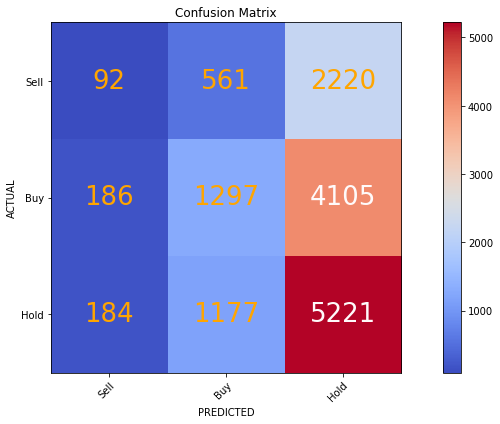

In [17]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()